Lecture 3 (17/02/2020)

Lecture 3 doesn't cover a whole lot of new material. The numerical method being used is still forward Euler integration. It does cover some stuff on Interpolation and state dependent acceleration.

In [42]:
import math, time, sys, os
import numpy as np
import matplotlib.pyplot as plt

The following example problem deals with a ship yadi yada insert later

In [43]:
# All units in SI units
t0 = 0
t1 = 200
dt = 0.1
x0 = 0
v0 = 5
mass = 100
F = 12

t = np.linspace(t0, t1, 1 + round((t1 -t0)/dt))
x_num = np.zeros(len(t))
v_num = np.zeros(len(t))
x_num[0] = x0
v_num[0] = v0

In [44]:
for i in range(len(t)-1):
    a = F/mass
    v_num[i+1] = v_num[i] + a*dt
    x_num[i+1] = x_num[i] + v_num[i]*dt

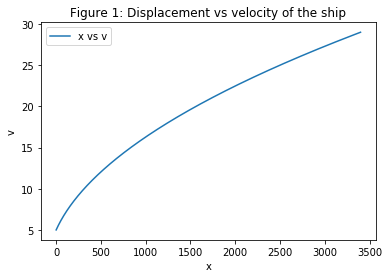

In [45]:
plt.xlabel('x')
plt.ylabel('v')
plt.title('Figure 1: Displacement vs velocity of the ship')
plt.plot(x_num, v_num, label ='x vs v')
plt.legend()

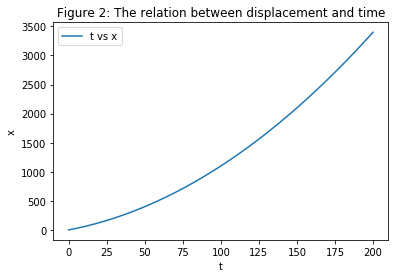

In [46]:
plt.xlabel('t')
plt.ylabel('x')
plt.title('Figure 2: The relation between displacement and time')
plt.plot(t, x_num, label ='t vs x')
plt.legend()

Since the numerical method uses discrete steps in time of $\Delta t$ there is no exact value for each single point of the graph. Interpolation needs to be used to calculate the "missing" values. It works by making a linearization like $L(x) = f(a) + f'(a)(x-a)$ between the 2 closest excisting points. This effectivly creates an approximation of the value of the point. To actually interpolate the np.interp() method is used. This method takes a point where the interpolation needs to be done and the 2 relevant arrays that need to be interpolated as arguments.

In [47]:
ans1 = np.interp(3000, x_num, v_num)
ans2 = np.interp(2000, x_num, t)

print('Interpolated velocity at 3000 m is {} m/s'.format(ans1))
print('Interpolated time at a displacement of 2000 m is {} seconds'.format(ans2))

Interpolated velocity at 3000 m is 27.299589097304064 m/s
Interpolated time at a displacement of 2000 m is 145.6405838376637 seconds


The next problem relates to forward Euler integration with state dependent accelaration. This means that the acceleration of some mass $m$ is dependent on either it's current velocity $v$ or it's current displacement $s$.

In [48]:
# All values in SI units
t0 = 0
t1 = 20
dt = 0.001
F_prop = 0
x0 = 0
v0 = 10
mass = 100 * 1000

t = np.linspace(t0, t1, 1 + round((t1 -t0)/dt))
x_num = np.zeros(len(t))
v_num = np.zeros(len(t))
x_num[0] = x0
v_num[0] = v0

In [49]:
def F_ship(v):
    return 100*v**3

for i in range(len(t)-1):
    a = (1/mass) * (F_prop - F_ship(v_num[i]))
    v_num[i+1] = v_num[i] + a*dt
    x_num[i+1] = x_num[i] + v_num[i]*dt

No handles with labels found to put in legend.


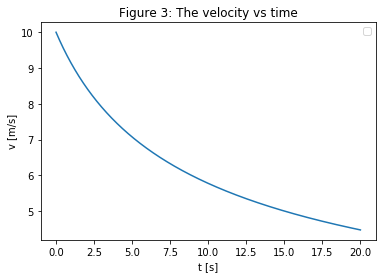

In [50]:
plt.title('Figure 3: The velocity vs time')
plt.ylabel('v [m/s]')
plt.xlabel('t [s]')
plt.plot(t, v_num)
plt.legend()

No handles with labels found to put in legend.


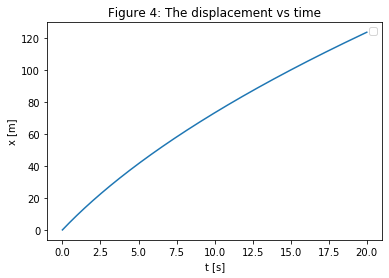

In [51]:
plt.title('Figure 4: The displacement vs time')
plt.ylabel('x [m]')
plt.xlabel('t [s]')
plt.plot(t, x_num)
plt.legend()

Solving analytically for the value of $x$ at $t=8\,s$ gives $x = 61.2451...\,m$ I am currently too lazy to actually put the integral here so just imagine it's here or something. Below the difference between the analytcial solution and the numerical solution will be shown. It's worth noting that this difference scales linear with the size of the $\Delta t$ steps.

In [53]:
x_an_ans = 61.24515497
print('The difference between the analytical solution and the numerical solution at 8 seconds is {}'.format(abs(x_an_ans - x_num[8000])))

The difference between the analytical solution and the numerical solution at 8 seconds is 0.0006461144392844176
